# Transitive closure and Warshall's Algorithm

## MTH 325: Discrete Structures for Computer Science 2, Fall 2016

## Overview

__Summary:__ In this lesson we focus in on an important topic in relations, the __transitive closure__ of a relation. Transitive closures are especially important in modeling networks (social networks, computer networks, etc.) because they describe how to create direct connection between nodes that are distantly connected, like LinkedIn tries to connect you with people who are 5 levels removed. A particular focus here will be __Warshall's algorithm__, a polynomial-time algorithm for computing the adjacency matrix of the transitive closure. 

This lesson addresses the following learning targets: 

+ **3.5:** Determine whether two points in a relation belong to the transitive closure of that relation, and I can use Warshall’s Algorithm to find the matrix for the transitive closure of a relation.

## Background

Your background this time comes in the form of three videos to watch. 

The first describes the concept of the transitive closure and does a visual example. 

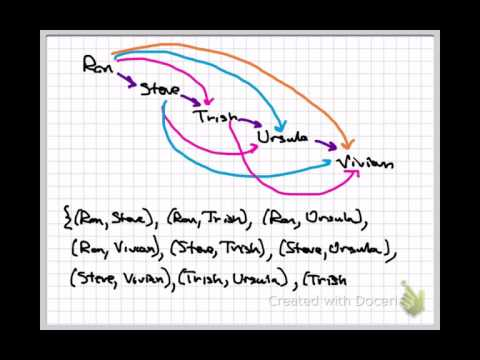

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("OO8Jfs9uZnc")

The second and third introduce Warshall's Algorithm. One video discusses the idea behind the algorithm and how it works, and the second walks partially through a small example. 

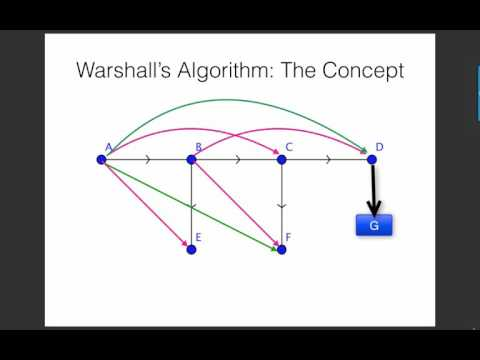

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("hKCqske0rAE")

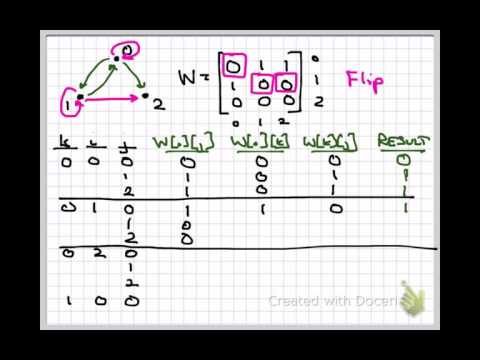

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo("BTRssTnhZVU")

### Other resources for learning

There are _lots_ of videos about Warshall's Algorithm on YouTube. If these three aren't enough, go do a simple YouTube query. Also, see the Appendix below for how to generate random directed graphs for practice purposes; generate some random digraphs and find the transitive closure by hand, and then use the code posted at the [GitHub gist](https://gist.github.com/RobertTalbert/99e176d7ea40e77bfe05) to check your work. 


## How to find the transitive closure of a relation using networkX

Remember that to define a relation on a set in networkX, we have to represent it as a directed graph. Let's start with a simple relation on the set $\{0,1,2,3,4\}$:  

In [4]:
import networkx as nx

simple_relation_edges = [(0,1), (1,2), (2,3), (3,4), (3,2), (3,1)]
simple_relation = nx.DiGraph(simple_relation_edges)

Let's visualize this to get an idea of its structure: 

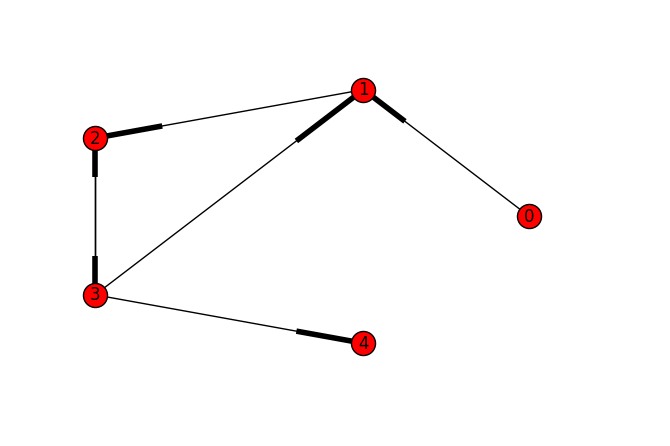

In [5]:
import matplotlib.pyplot as plt

nx.draw_circular(simple_relation, with_labels=True, directed = True)
plt.show()

A quick check of the digraph will tell you this relation isn't transitive. For example there would need to be edges from 0 to 2, 0 to 3, 1 to 3, and self-loops on 2 and 3 just to name a few of these. 

As you might expect, networkX has a method for finding the transitive closure of a relation (actually, a digraph) and it's predictably called `.transitive_closure`. Here's how it works: 

In [6]:
nx.transitive_closure(simple_relation)

So the input of this method is a directed graph and the output is another directed graph. It usually helps to give this output a name, and then you can do stuff with it like list its edges: 

In [7]:
tc = nx.transitive_closure(simple_relation)
tc.edges()

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 1),
 (2, 3),
 (2, 4),
 (3, 1),
 (3, 2),
 (3, 4)]

...or visualize it: 

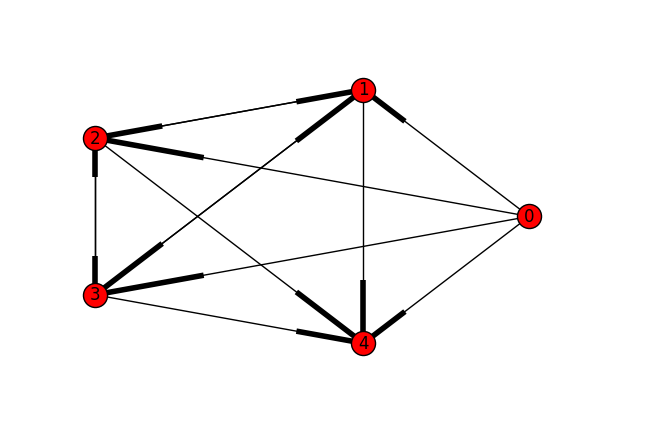

In [8]:
nx.draw_circular(tc, with_labels=True, directed = True)
plt.show()

If you wanted to see the edges that were added in the transitive closure process, a quick list comprehension will do it: 

In [9]:
# What this does, is list all the edges in the edge list for "tc" 
# as long as the edge was not in the edge list for simple_relation. 

[edge for edge in tc.edges() if edge not in simple_relation.edges()]

[(0, 2), (0, 3), (0, 4), (1, 3), (1, 4), (2, 1), (2, 4)]

**Warning:** Note that as we've seen before, networkX does not like self-loops and it does not pick up the self-loops that should be generated in the transitive closure process. So this is not a perfect solution. 